In [1]:
# Be a terrible human being and disable warnings. 
import warnings
warnings.filterwarnings('ignore')

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Load Data.
df = pd.read_pickle(open('../data/pickles/Model_1_vars.pickle'))

# Replace NaN with 0 to avoid choking the regression engine.
# Lots of arguments to drop entries that do not have a full set of answers,
# however this does not appear to have been done in the original paper.
df = df.fillna(0)

# Get and Scale Dependent Var. (Support) 
y = pd.DataFrame.pop(df, 'SUPPORT')
scaler = MinMaxScaler(feature_range=(0,100))
y = scaler.fit_transform(y)

# Get Weights
weights = pd.DataFrame.pop(df,'EUROPEAN WEIGHT')
# To match terminology, Explanatory/independent/experimental/predictor called X. 
X = df
# Adds var 'const' as it's required for the regression.
# Docs: http://www.statsmodels.org/dev/generated/statsmodels.tools.tools.add_constant.html
X = sm.add_constant(X)

# "The baseline respondent in each model has the following characteristics: "occasionally" discusses 
# political matters with friends; has "mixed" political values works in a white-collar profession; 
# finished school between age 14 and 20 falls in the second-to-lowest national income quartile, 
# and resides in a non-border region. The baseline year and nation differ across models so that 
# the largest national and annual sample serves as the omitted categories. "

X = X.drop(['GB-GBN','WHITE_COLLAR',1989,'EDU_LOW_MID','INC_LOW_MID','CM_OCCASIONALLY'], axis=1)

/Users/tdeburca/Library/Python/2.7/lib/python/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/tdeburca/Library/Python/2.7/lib/python/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [2]:
print('X =', X.shape)
print('y =', y.shape)

print('weights = ', weights.shape)

('X =', (243377, 50))
('y =', (243377,))
('weights = ', (243377,))


sm.OLS: takes two array-like objects: X and y. 

X will either be a numpy array or a pandas data frame with shape (n, p) where n is the number of data points and p is the number of predictors.

y is the dependent 

In [3]:
wls_model = sm.WLS(y,X, weights=weights)
res = wls_model.fit(cov_type='HC0')

res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Weigthed least squares
=================================================================
Model:                WLS              Adj. R-squared:     0.131 
Dependent Variable:   y                AIC:                inf   
Date:                 2017-08-09 14:23 BIC:                inf   
No. Observations:     243377           Log-Likelihood:     -inf  
Df Model:             49               F-statistic:        610.9 
Df Residuals:         243327           Prob (F-statistic): 0.00  
R-squared:            0.131            Scale:              553.49
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            63.4871   0.4003 158.5890 0.0000 62.7024 64.2717
CM_FREQUENTLY     2.0042   0.1974  10.1549 0.0000  1.6174  2.3911
CM_NEVER         -4.8248   0.1544 -31.2404 0.0000 -5.1275 -4.5221
MATERIALIST      -0.7276   0.1544  -4.7134 0.0000 -1.0302 -0.4251
POST_MATERIALIST  1.7570   0.2053   8.5572 0.0000  1.3546  2.1594
EDU_LOW          -3.4243   0.1858 -18.4258 0.0000 -3.7885 -3.0600
EDU_HIGH_MID      3.1413   0.2564  12.2494 0.0000  2.6387  3.6439
EDU_HIGH          3.5452   0.2194  16.1585 0.0000  3.1151  3.9752
INC_LOW          -2.0921   0.1810 -11.5614 0.0000 -2.4468 -1.7374
INC_HIGH_MID      1.8357   0.1793  10.2372 0.0000  1.4842  2.1871
INC_HIGH          3.6120   0.2027  17.8215 0.0000  3.2148  4.0093
FARMER           -3.4168   0.5606  -6.0954 0.0000 -4.5155 -2.3181
PROFESSIONAL      2.8243   0.4198   6.7283 0.0000  2.0016  3.6470
MANUAL           -3.5109   0.2210 -15.8841 0.0000 -3.9442 -3.0777
OWNER            -1.5264   0.4056  -3.7634 0.0002 -2.3214 -0.7315
EXECUTIVE         2.9148   0.3877   7.5174 0.0000  2.1548  3.6747
RETIRED          -0.0220   0.2787  -0.0789 0.9371 -0.5682  0.5242
HOUSEWIFE        -1.0253   0.2284  -4.4888 0.0000 -1.4730 -0.5776
STUD_MIL          0.9103   0.2746   3.3152 0.0009  0.3721  1.4484
UNEMPLOYED       -1.8302   0.3169  -5.7759 0.0000 -2.4513 -1.2092
SUPPORT_FOR_GOV   3.2008   0.1591  20.1173 0.0000  2.8889  3.5126
SUPPORT_PROL      0.9405   0.1608   5.8496 0.0000  0.6254  1.2556
SUPPORT_BOUR      3.1546   0.2030  15.5385 0.0000  2.7567  3.5525
1978              1.8700   0.4286   4.3633 0.0000  1.0300  2.7100
1979              1.3515   0.3413   3.9596 0.0001  0.6825  2.0205
1980             -1.0963   0.3409  -3.2158 0.0013 -1.7645 -0.4281
1981              0.3886   0.3252   1.1947 0.2322 -0.2489  1.0260
1982             -0.3991   0.3329  -1.1991 0.2305 -1.0515  0.2533
1983              0.3154   0.3357   0.9394 0.3475 -0.3426  0.9733
1984              2.7535   0.3205   8.5905 0.0000  2.1253  3.3817
1985              3.3045   0.3327   9.9324 0.0000  2.6524  3.9566
1986              4.2211   0.3226  13.0843 0.0000  3.5888  4.8534
1987              4.0859   0.3428  11.9210 0.0000  3.4142  4.7577
1988             -3.2228   0.3588  -8.9819 0.0000 -3.9261 -2.5196
1990              4.5317   0.3115  14.5503 0.0000  3.9213  5.1421
1991              2.4166   0.3319   7.2807 0.0000  1.7661  3.0672
1992              2.3585   0.4016   5.8733 0.0000  1.5714  3.1455
WOMAN            -3.2325   0.1522 -21.2444 0.0000 -3.5307 -2.9342
AGE               0.0074   0.0058   1.2748 0.2024 -0.0040  0.0189
BE               11.7609   0.2106  55.8401 0.0000 11.3481 12.1737
DE-W              7.4362   0.2705  27.4919 0.0000  6.9061  7.9664
DK               -6.0168   0.2364 -25.4568 0.0000 -6.4800 -5.5535
ES               14.1255   0.3039  46.4880 0.0000 13.5300 14.7211
FR               11.6709   0.2079  56.1310 0.0000 11.2634 12.0784
GR                7.4493   0.3120  23.8791 0.0000  6.8379  8.0607
IE               10.0469   0.2397  41.9169 0.0000  9.5771 10.5166
IT               18.3000   0.2257  81.0672 0.0000 17.8576 18.7425
LU               16.6036   0.3325  49.9329 0.0000 15.9519 17.2553
NL      

In [4]:
Exp_Vars = ['CM_NEVER',
 'CM_FREQUENTLY', 
 'MATERIALIST',
 'POST_MATERIALIST',
 'PROFESSIONAL',
 'EXECUTIVE',
 'MANUAL',
 'UNEMPLOYED',
 'EDU_LOW',
 'EDU_HIGH_MID',
 'EDU_HIGH',
 'INC_LOW',
 'INC_HIGH_MID',
 'INC_HIGH',
 'SUPPORT_PROL',
 'SUPPORT_BOUR',
 'SUPPORT_FOR_GOV']

Control_Vars = ['WOMAN',
 'RETIRED',
 'OWNER',
 'FARMER',
 'STUD_MIL',
 'HOUSEWIFE',
 'AGE',
 'FR',
 'DE-W',
 'IT',
 'NL',
 'LU',
 'BE',
 'IE',
 'DK',
 'GR',
 'PT',
 'ES',
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1990,
 1991,
 1992,
'const']


Misc_Vars = ['WHITE_COLLAR', 'CM_OCCASIONALLY', 'EDU_LOW_MID', 'INC_LOW_MID', 'GB-GBN',  1989]

In [5]:
for i in Control_Vars:
    print  res.params[i]

-3.23246242322
-0.0219760578309
-1.52642314663
-3.41680798433
0.910250704477
-1.02533039475
0.00743637578086
11.6708969982
7.43624642109
18.3000452485
13.2615932382
16.6035900266
11.7608768316
10.0468729374
-6.016792337
7.44931599358
15.6302757121
14.1255293569
1.86997110956
1.35149384025
-1.09628676548
0.388569076708
-0.399122736989
0.315357426858
2.75348200407
3.30452111606
4.22108660664
4.08593859247
-3.22280959116
4.53169803988
2.41664858283
2.3584761848
63.4870682445


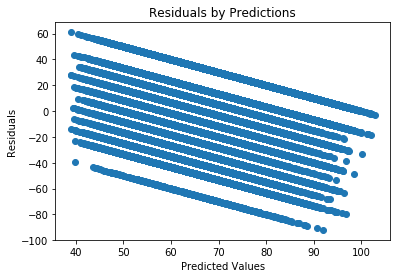

In [6]:
# from seaborn import plt
import matplotlib.pyplot as plt
fit2 = res
plt.scatter(fit2.fittedvalues, fit2.resid) #plot residuals against predictions
plt.title('Residuals by Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

In [10]:
res.f_pvalue

array(0.0)

In [11]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_params_default',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_prediction',
 'get_robustcov_results',
 'het_scale',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'params',
 'predict',
 'pvalues',
 'remov

In [13]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Weigthed least squares
=================================================================
Model:                WLS              Adj. R-squared:     0.131 
Dependent Variable:   y                AIC:                inf   
Date:                 2017-08-09 14:25 BIC:                inf   
No. Observations:     243377           Log-Likelihood:     -inf  
Df Model:             49               F-statistic:        610.9 
Df Residuals:         243327           Prob (F-statistic): 0.00  
R-squared:            0.131            Scale:              553.49
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            63.4871   0.4003 158.5890 0.0000 62.7024 64.2717
CM_FREQUENTLY     2.0042   0.1974  10.1549 0.0000  1.6174  2.3911
CM_NEVER         -4.8248   0.1544 -31.2404 0.0000 -5.1275 -4.5221
MATERIALIST      -0.7276   0.1544  -4.7134 0.0000 -1.0302 -0.4251
POST_MATERIALIST  1.7570   0.2053   8.5572 0.0000  1.3546  2.1594
EDU_LOW          -3.4243   0.1858 -18.4258 0.0000 -3.7885 -3.0600
EDU_HIGH_MID      3.1413   0.2564  12.2494 0.0000  2.6387  3.6439
EDU_HIGH          3.5452   0.2194  16.1585 0.0000  3.1151  3.9752
INC_LOW          -2.0921   0.1810 -11.5614 0.0000 -2.4468 -1.7374
INC_HIGH_MID      1.8357   0.1793  10.2372 0.0000  1.4842  2.1871
INC_HIGH          3.6120   0.2027  17.8215 0.0000  3.2148  4.0093
FARMER           -3.4168   0.5606  -6.0954 0.0000 -4.5155 -2.3181
PROFESSIONAL      2.8243   0.4198   6.7283 0.0000  2.0016  3.6470
MANUAL           -3.5109   0.2210 -15.8841 0.0000 -3.9442 -3.0777
OWNER            -1.5264   0.4056  -3.7634 0.0002 -2.3214 -0.7315
EXECUTIVE         2.9148   0.3877   7.5174 0.0000  2.1548  3.6747
RETIRED          -0.0220   0.2787  -0.0789 0.9371 -0.5682  0.5242
HOUSEWIFE        -1.0253   0.2284  -4.4888 0.0000 -1.4730 -0.5776
STUD_MIL          0.9103   0.2746   3.3152 0.0009  0.3721  1.4484
UNEMPLOYED       -1.8302   0.3169  -5.7759 0.0000 -2.4513 -1.2092
SUPPORT_FOR_GOV   3.2008   0.1591  20.1173 0.0000  2.8889  3.5126
SUPPORT_PROL      0.9405   0.1608   5.8496 0.0000  0.6254  1.2556
SUPPORT_BOUR      3.1546   0.2030  15.5385 0.0000  2.7567  3.5525
1978              1.8700   0.4286   4.3633 0.0000  1.0300  2.7100
1979              1.3515   0.3413   3.9596 0.0001  0.6825  2.0205
1980             -1.0963   0.3409  -3.2158 0.0013 -1.7645 -0.4281
1981              0.3886   0.3252   1.1947 0.2322 -0.2489  1.0260
1982             -0.3991   0.3329  -1.1991 0.2305 -1.0515  0.2533
1983              0.3154   0.3357   0.9394 0.3475 -0.3426  0.9733
1984              2.7535   0.3205   8.5905 0.0000  2.1253  3.3817
1985              3.3045   0.3327   9.9324 0.0000  2.6524  3.9566
1986              4.2211   0.3226  13.0843 0.0000  3.5888  4.8534
1987              4.0859   0.3428  11.9210 0.0000  3.4142  4.7577
1988             -3.2228   0.3588  -8.9819 0.0000 -3.9261 -2.5196
1990              4.5317   0.3115  14.5503 0.0000  3.9213  5.1421
1991              2.4166   0.3319   7.2807 0.0000  1.7661  3.0672
1992              2.3585   0.4016   5.8733 0.0000  1.5714  3.1455
WOMAN            -3.2325   0.1522 -21.2444 0.0000 -3.5307 -2.9342
AGE               0.0074   0.0058   1.2748 0.2024 -0.0040  0.0189
BE               11.7609   0.2106  55.8401 0.0000 11.3481 12.1737
DE-W              7.4362   0.2705  27.4919 0.0000  6.9061  7.9664
DK               -6.0168   0.2364 -25.4568 0.0000 -6.4800 -5.5535
ES               14.1255   0.3039  46.4880 0.0000 13.5300 14.7211
FR               11.6709   0.2079  56.1310 0.0000 11.2634 12.0784
GR                7.4493   0.3120  23.8791 0.0000  6.8379  8.0607
IE               10.0469   0.2397  41.9169 0.0000  9.5771 10.5166
IT               18.3000   0.2257  81.0672 0.0000 17.8576 18.7425
LU               16.6036   0.3325  49.9329 0.0000 15.9519 17.2553
NL      

In [19]:
for i in res.pvalues.keys():
    if res.pvalues[i] > .01:
        print i, res.pvalues[i]

RETIRED 0.93714764738
1981 0.232205440784
1982 0.230505663036
1983 0.347543049869
AGE 0.202391404444
